In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import pandas as pd

In [64]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 14

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [113]:
def plot(labels, km_add, km_cat, gmm_add, gmm_cat, em):
    plt.figure(figsize=(20,5))
    #plt.plot(km_add, '-go', label="K-Means (Add)")
    #plt.plot(km_cat, '--r', label="K-Means (Cat)")
    #plt.plot(gmm_add, '-ys', label="GMM (Add)")
    #plt.plot(gmm_cat, '--b>', label="GMM (Cat)")
    df = pd.DataFrame(data=list(zip(km_add, km_cat, gmm_add, gmm_cat)), columns=['K-Means (Add)', 'K-Means (Cat)', 'GMM (Add)', 'GMM (Cat)'])
    df.reset_index()
    sns.set_style("ticks", {'axes.grid' : True})
    colors = ['#D68835', '#455E85', '#CF298F', '#366638']
    sns.lineplot(data=df, palette=colors, markers=True, markersize=11)
    #plt.title("Experimental Results: " + 
    #          (em.title() if em == 'purity' else em.upper()) + " Data " +
    #          ("R" if num == '34' else "C" + num), fontsize=30)
    plt.legend(loc="best")
    #plt.xlabel('Data', fontsize=30)
    plt.ylabel(em.upper())
    #plt.xticks(rotation=90, fontsize=15)
    plt.xticks(ticks=range(len(labels)), labels=labels, rotation=90)
    #plt.yticks(fontsize=15)
    #plt.ylim([0.1, 0.7])
    #plt.grid()
    #plt.savefig(("plot_result/Experimental_Results_" + 
    #          (em.title() if em == 'purity' else em.upper()) + "_Data_" +
    #          ("R" if num == '34' else "C") + num + ".png"),format='png',bbox_inches='tight',dpi=300)

In [128]:
def make_df(km_add, km_cat, gmm_add, gmm_cat, c_num, em):
    df = pd.DataFrame(data=list(zip(km_add, km_cat, gmm_add, gmm_cat)), columns=['K-Means (Add)', 'K-Means (Cat)', 'GMM (Add)', 'GMM (Cat)'])
    if c_num == '23':
        if em == 'ari':
            df_ari_23 = df.copy(deep=True)
        elif em == 'nmi':
            df_nmi_23 = df.copy(deep=True)
        elif em == 'purity':
            df_purity_23 = df.copy(deep=True)
    elif c_num == '34':
        if em == 'ari':
            df_ari_34 = df.copy(deep=True)
        elif em == 'nmi':
            df_nmi_34 = df.copy(deep=True)
        elif em == 'purity':
            df_purity_34 = df.copy(deep=True)

In [129]:
weights = ["0.1", "0.2", "0.3", "0.4", "0.5", "0.6", "0.7", "0.8", "0.9"]
class_num = ["23", "34"]
evaluation_method = ["purity", "nmi", "ari"]


In [142]:
for c_num in class_num:
    for em in evaluation_method:
        uni = list()
        add = list()
        cat = list()
        for file in glob.glob('./csv_' + c_num + '/' + em + '/*'):
            if "add" in file:
                add.append(file)
            elif "cat" in file:
                cat.append(file)
            else:
                uni.append(file)

        uni.sort()
        add.sort()
        cat.sort()

        labels = list()
        labels_x = list()
        km_add = list()
        km_cat = list()
        gmm_add = list()
        gmm_cat = list()
        for csvFile in uni:
            if 're' in csvFile:
                labels.append("Real")
                labels_x.append('Real')
            elif 'seq2seq' in csvFile:
                labels.append("seq2seq")
                labels_x.append('seq2seq')
            elif 'se' in csvFile:
                labels.append("Semantic")
                labels_x.append('Semantic')
            elif 'rico' in csvFile:
                labels.append("Rico")
                labels_x.append('Rico')
            with open(csvFile, 'r') as f:
                res = f.readline()
                km_add.append(float(res.split(',')[-1]))
                km_cat.append(float(res.split(',')[-1]))
                gmm_add.append(float(res.split(',')[0]))
                gmm_cat.append(float(res.split(',')[0]))


        for csvFile in add:
            if 'rico' in csvFile:
                if 'seq2seq' in csvFile:
                    is_w = False
                    for w in weights:
                        if w in csvFile:
                            #labels.append("Rico & seq2seq " + w)
                            #is_w = True
                            #break
                            labels_x.append(w)
                            if w == "0.1":
                                labels.append("Rico & seq2seq " + w)
                                is_w = True
                                break
                            else:
                                labels.append(w)
                                is_w = True
                                break
                    if not is_w:
                        continue
                        #labels.append("Rico & seq2seq")
                elif 're' in csvFile:
                    is_w = False
                    for w in weights:
                        if w in csvFile:
                            #labels.append("Rico & Real " + w)
                            #is_w = True
                            #break
                            labels_x.append(w)
                            if w == "0.1":
                                labels.append("Rico & Real " + w)
                                is_w = True
                                break
                            else:
                                labels.append(w)
                                is_w = True
                                break
                    if not is_w:
                        continue
                        #labels.append("Rico & Real Activity Image")
                elif 'se' in csvFile:
                    is_w = False
                    for w in weights:
                        if w in csvFile:
                            #labels.append("Rico & Semantic " + w)
                            #is_w = True
                            #break
                            labels_x.append(w)
                            if w == "0.1":
                                labels.append("Rico & Semantic " + w)
                                is_w = True
                                break
                            else:
                                labels.append(w)
                                is_w = True
                                break
                    if not is_w:
                        continue
                        #labels.append("Rico & Semantic Activity Image")
            elif 'seq2seq' in csvFile:
                if 're' in csvFile:
                    is_w = False
                    for w in weights:
                        if w in csvFile:
                            #labels.append("seq2seq & Real " + w)
                            #is_w = True
                            #break
                            labels_x.append(w)
                            if w == "0.1":
                                labels.append("seq2seq & Real " + w)
                                is_w = True
                                break
                            else:
                                labels.append(w)
                                is_w = True
                                break
                    if not is_w:
                        continue
                        #labels.append("seq2seq & Real Activity Image")
                elif 'se' in csvFile:
                    is_w = False
                    for w in weights:
                        if w in csvFile:
                            #labels.append("seq2seq & Semantic " + w)
                            #is_w = True
                            #break
                            labels_x.append(w)
                            if w == "0.1":
                                labels.append("seq2seq & Semantic " + w)
                                is_w = True
                                break
                            else:
                                labels.append(w)
                                is_w = True
                                break
                    if not is_w:
                        continue
                        #labels.append("seq2seq & Semantic Activity Image")
            else:
                is_w = False
                for w in weights:
                    if w in csvFile:
                        #labels.append("Real & Semantic " + w)
                        #is_w = True
                        #break
                        labels_x.append(w)
                        if w == "0.1":
                            labels.append("Real & Semantic " + w)
                            is_w = True
                            break
                        else:
                            labels.append(w)
                            is_w = True
                            break
                if not is_w:
                    continue
                    #labels.append("Real & Semantic Activity Image")
            with open(csvFile, 'r') as f:
                res = f.readline()
                km_add.append(float(res.split(',')[-1]))
                gmm_add.append(float(res.split(',')[0]))

        for csvFile in cat:
            if 'rico' in csvFile:
                if 'seq2seq' in csvFile:
                    is_w = False
                    for w in weights:
                        if w in csvFile:
                            is_w = True
                            break
                    if not is_w:
                        continue
                elif 're' in csvFile:
                    is_w = False
                    for w in weights:
                        if w in csvFile:
                            is_w = True
                            break
                    if not is_w:
                        continue
                elif 'se' in csvFile:
                    is_w = False
                    for w in weights:
                        if w in csvFile:
                            is_w = True
                            break
                    if not is_w:
                        continue
            elif 'seq2seq' in csvFile:
                if 're' in csvFile:
                    is_w = False
                    for w in weights:
                        if w in csvFile:
                            is_w = True
                            break
                    if not is_w:
                        continue
                elif 'se' in csvFile:
                    is_w = False
                    for w in weights:
                        if w in csvFile:
                            is_w = True
                            break
                    if not is_w:
                        continue
            else:
                is_w = False
                for w in weights:
                    if w in csvFile:
                        is_w = True
                        break
                if not is_w:
                    continue
            with open(csvFile, 'r') as f:
                res = f.readline()
                km_cat.append(float(res.split(',')[-1]))
                gmm_cat.append(float(res.split(',')[0]))
                
        #make_df(km_add, km_cat, gmm_add, gmm_cat, c_num, em)
        #plot(labels, km_add, km_cat, gmm_add, gmm_cat, em)
        df = pd.DataFrame(data=list(zip(km_add, km_cat, gmm_add, gmm_cat)), columns=['K-Means (Add)', 'K-Means (Cat)', 'GMM (Add)', 'GMM (Cat)'])
        if c_num == '23':
            if em == 'ari':
                df_ari_23 = df.copy(deep=True)
            elif em == 'nmi':
                df_nmi_23 = df.copy(deep=True)
            elif em == 'purity':
                df_purity_23 = df.copy(deep=True)
        elif c_num == '34':
            if em == 'ari':
                df_ari_34 = df.copy(deep=True)
            elif em == 'nmi':
                df_nmi_34 = df.copy(deep=True)
            elif em == 'purity':
                df_purity_34 = df.copy(deep=True)

In [131]:
print(labels)
df_nmi_23.max().max()

['Real', 'Semantic', 'Rico', 'seq2seq', 'Real & Semantic 0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', 'Rico & Real 0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', 'Rico & Semantic 0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', 'Rico & seq2seq 0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', 'seq2seq & Real 0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', 'seq2seq & Semantic 0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9']


0.604

Text(49, 0.1, 'seq2seq & Semantic')

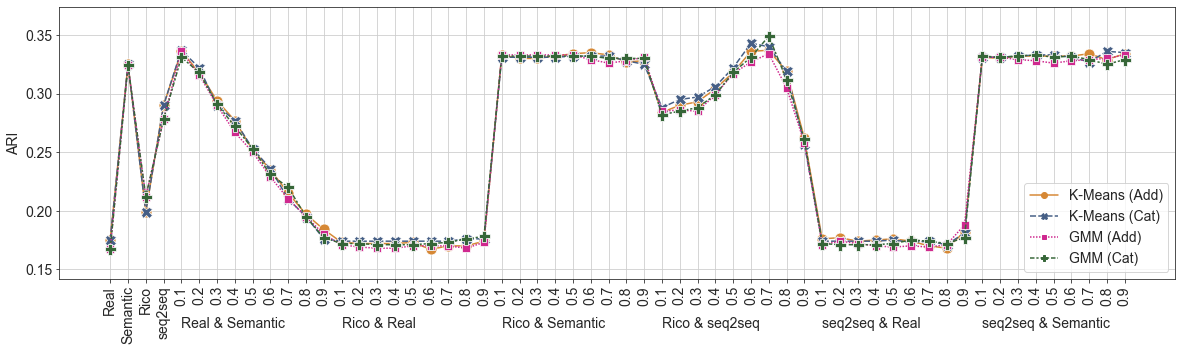

In [153]:
plt.figure(figsize=(20,5))
#plt.plot(km_add, '-go', label="K-Means (Add)")
#plt.plot(km_cat, '--r', label="K-Means (Cat)")
#plt.plot(gmm_add, '-ys', label="GMM (Add)")
#plt.plot(gmm_cat, '--b>', label="GMM (Cat)")
df_ari_23.reset_index()
sns.set_style("ticks", {'axes.grid' : True})
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_ari_23, palette=colors, markers=True, markersize=11)
plt.legend(loc="best")
plt.ylabel('ARI')
plt.xticks(ticks=range(len(labels_x)), labels=labels_x, rotation=90)
plt.ylim([df_ari_23.min().min()-0.025, df_ari_23.max().max()+0.025])
plt.text(4, 0.1, 'Real & Semantic')
plt.text(13, 0.1, 'Rico & Real')
plt.text(22, 0.1, 'Rico & Semantic')
plt.text(31, 0.1, 'Rico & seq2seq')
plt.text(40, 0.1, 'seq2seq & Real')
plt.text(49, 0.1, 'seq2seq & Semantic')

#plt.savefig(("plot_result/Experimental_Results_" + 
#          (em.title() if em == 'purity' else em.upper()) + "_Data_" +
#          ("R" if num == '34' else "C") + num + ".png"),format='png',bbox_inches='tight',dpi=300)

Text(49, 0.407, 'seq2seq & Semantic')

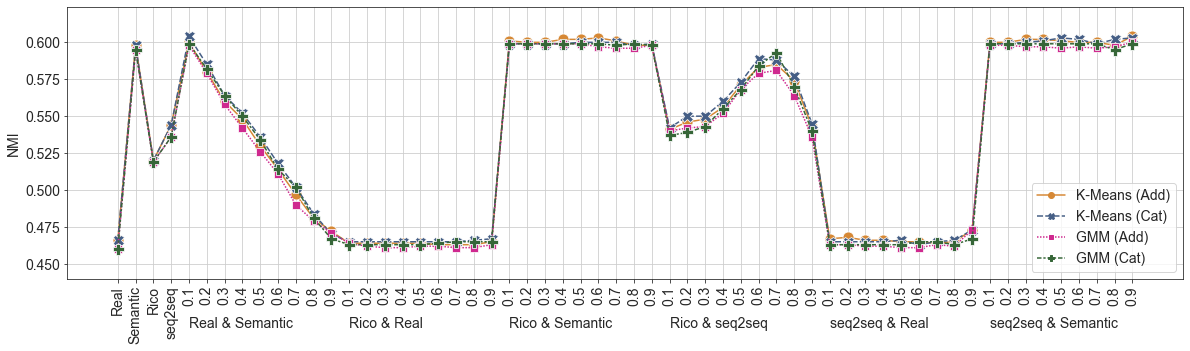

In [163]:
plt.figure(figsize=(20,5))
#plt.plot(km_add, '-go', label="K-Means (Add)")
#plt.plot(km_cat, '--r', label="K-Means (Cat)")
#plt.plot(gmm_add, '-ys', label="GMM (Add)")
#plt.plot(gmm_cat, '--b>', label="GMM (Cat)")
df_nmi_23.reset_index()
sns.set_style("ticks", {'axes.grid' : True})
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_nmi_23, palette=colors, markers=True, markersize=11)
plt.legend(loc="best")
plt.ylabel('NMI')
plt.xticks(ticks=range(len(labels_x)), labels=labels_x, rotation=90)
plt.ylim([df_nmi_23.min().min()-0.02, df_nmi_23.max().max()+0.02])
plt.text(4, 0.407, 'Real & Semantic')
plt.text(13, 0.407, 'Rico & Real')
plt.text(22, 0.407, 'Rico & Semantic')
plt.text(31, 0.407, 'Rico & seq2seq')
plt.text(40, 0.407, 'seq2seq & Real')
plt.text(49, 0.407, 'seq2seq & Semantic')

#plt.savefig(("plot_result/Experimental_Results_" + 
#          (em.title() if em == 'purity' else em.upper()) + "_Data_" +
#          ("R" if num == '34' else "C") + num + ".png"),format='png',bbox_inches='tight',dpi=300)

Text(49, 0.175, 'seq2seq & Semantic')

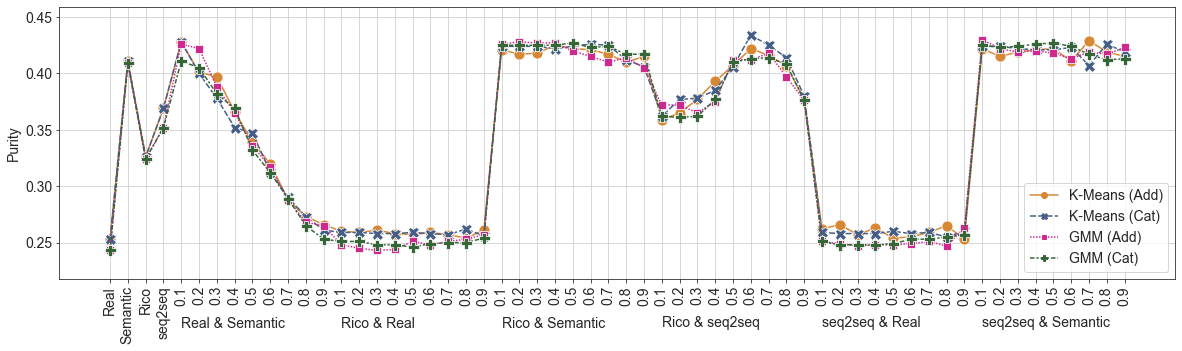

In [169]:
plt.figure(figsize=(20,5))
#plt.plot(km_add, '-go', label="K-Means (Add)")
#plt.plot(km_cat, '--r', label="K-Means (Cat)")
#plt.plot(gmm_add, '-ys', label="GMM (Add)")
#plt.plot(gmm_cat, '--b>', label="GMM (Cat)")
df_purity_23.reset_index()
sns.set_style("ticks", {'axes.grid' : True})
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_purity_23, palette=colors, markers=True, markersize=11)
plt.legend(loc="best")
plt.ylabel('Purity')
plt.xticks(ticks=range(len(labels_x)), labels=labels_x, rotation=90)
plt.ylim([df_purity_23.min().min()-0.025, df_purity_23.max().max()+0.025])
plt.text(4, 0.175, 'Real & Semantic')
plt.text(13, 0.175, 'Rico & Real')
plt.text(22, 0.175, 'Rico & Semantic')
plt.text(31, 0.175, 'Rico & seq2seq')
plt.text(40, 0.175, 'seq2seq & Real')
plt.text(49, 0.175, 'seq2seq & Semantic')

#plt.savefig(("plot_result/Experimental_Results_" + 
#          (em.title() if em == 'purity' else em.upper()) + "_Data_" +
#          ("R" if num == '34' else "C") + num + ".png"),format='png',bbox_inches='tight',dpi=300)

Text(49, 0.135, 'seq2seq & Semantic')

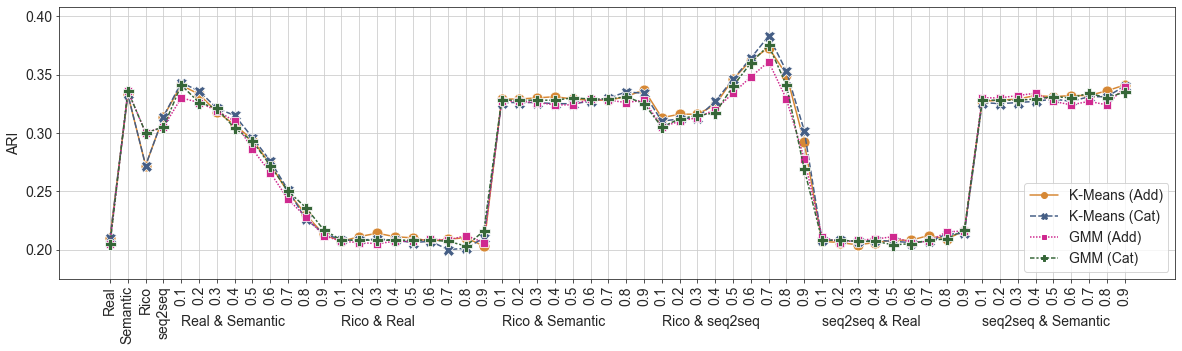

In [174]:
plt.figure(figsize=(20,5))
#plt.plot(km_add, '-go', label="K-Means (Add)")
#plt.plot(km_cat, '--r', label="K-Means (Cat)")
#plt.plot(gmm_add, '-ys', label="GMM (Add)")
#plt.plot(gmm_cat, '--b>', label="GMM (Cat)")
df_ari_34.reset_index()
sns.set_style("ticks", {'axes.grid' : True})
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_ari_34, palette=colors, markers=True, markersize=11)
plt.legend(loc="best")
plt.ylabel('ARI')
plt.xticks(ticks=range(len(labels_x)), labels=labels_x, rotation=90)
plt.ylim([df_ari_34.min().min()-0.025, df_ari_34.max().max()+0.025])
plt.text(4, 0.135, 'Real & Semantic')
plt.text(13, 0.135, 'Rico & Real')
plt.text(22, 0.135, 'Rico & Semantic')
plt.text(31, 0.135, 'Rico & seq2seq')
plt.text(40, 0.135, 'seq2seq & Real')
plt.text(49, 0.135, 'seq2seq & Semantic')

#plt.savefig(("plot_result/Experimental_Results_" + 
#          (em.title() if em == 'purity' else em.upper()) + "_Data_" +
#          ("R" if num == '34' else "C") + num + ".png"),format='png',bbox_inches='tight',dpi=300)

Text(49, 0.47, 'seq2seq & Semantic')

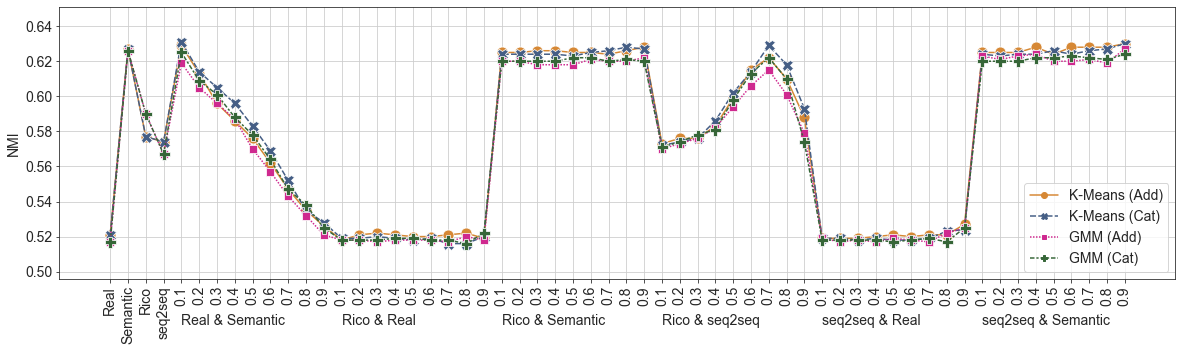

In [179]:
plt.figure(figsize=(20,5))
#plt.plot(km_add, '-go', label="K-Means (Add)")
#plt.plot(km_cat, '--r', label="K-Means (Cat)")
#plt.plot(gmm_add, '-ys', label="GMM (Add)")
#plt.plot(gmm_cat, '--b>', label="GMM (Cat)")
df_nmi_34.reset_index()
sns.set_style("ticks", {'axes.grid' : True})
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_nmi_34, palette=colors, markers=True, markersize=11)
plt.legend(loc="best")
plt.ylabel('NMI')
plt.xticks(ticks=range(len(labels_x)), labels=labels_x, rotation=90)
plt.ylim([df_nmi_34.min().min()-0.02, df_nmi_34.max().max()+0.02])
plt.text(4, 0.47, 'Real & Semantic')
plt.text(13, 0.47, 'Rico & Real')
plt.text(22, 0.47, 'Rico & Semantic')
plt.text(31, 0.47, 'Rico & seq2seq')
plt.text(40, 0.47, 'seq2seq & Real')
plt.text(49, 0.47, 'seq2seq & Semantic')

#plt.savefig(("plot_result/Experimental_Results_" + 
#          (em.title() if em == 'purity' else em.upper()) + "_Data_" +
#          ("R" if num == '34' else "C") + num + ".png"),format='png',bbox_inches='tight',dpi=300)

Text(49, 0.24, 'seq2seq & Semantic')

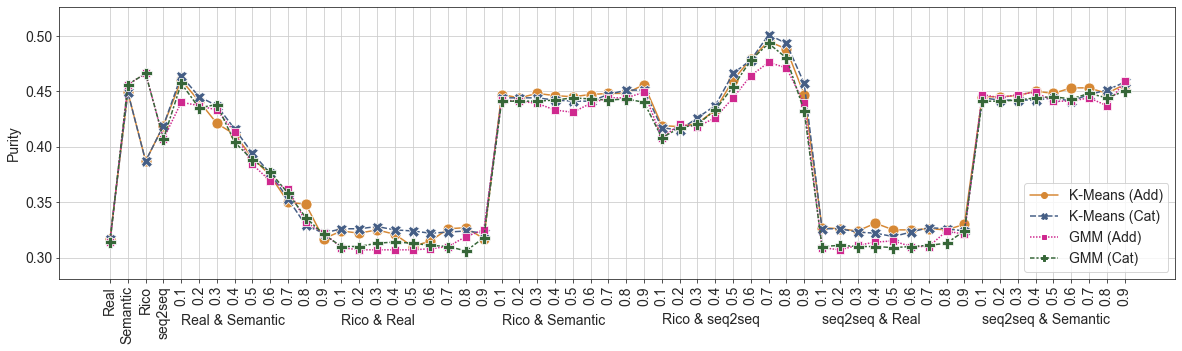

In [183]:
plt.figure(figsize=(20,5))
#plt.plot(km_add, '-go', label="K-Means (Add)")
#plt.plot(km_cat, '--r', label="K-Means (Cat)")
#plt.plot(gmm_add, '-ys', label="GMM (Add)")
#plt.plot(gmm_cat, '--b>', label="GMM (Cat)")
df_purity_34.reset_index()
sns.set_style("ticks", {'axes.grid' : True})
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_purity_34, palette=colors, markers=True, markersize=11)
plt.legend(loc="best")
plt.ylabel('Purity')
plt.xticks(ticks=range(len(labels_x)), labels=labels_x, rotation=90)
plt.ylim([df_purity_34.min().min()-0.025, df_purity_34.max().max()+0.025])
plt.text(4, 0.24, 'Real & Semantic')
plt.text(13, 0.24, 'Rico & Real')
plt.text(22, 0.24, 'Rico & Semantic')
plt.text(31, 0.24, 'Rico & seq2seq')
plt.text(40, 0.24, 'seq2seq & Real')
plt.text(49, 0.24, 'seq2seq & Semantic')

#plt.savefig(("plot_result/Experimental_Results_" + 
#          (em.title() if em == 'purity' else em.upper()) + "_Data_" +
#          ("R" if num == '34' else "C") + num + ".png"),format='png',bbox_inches='tight',dpi=300)